# **Assignment 6: Providing Data-driven Suggestions for HR**

This assignment is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a fictional consulting firm.

Stages of workflow

- Plan
- Analyze
- Construct 
- Execute

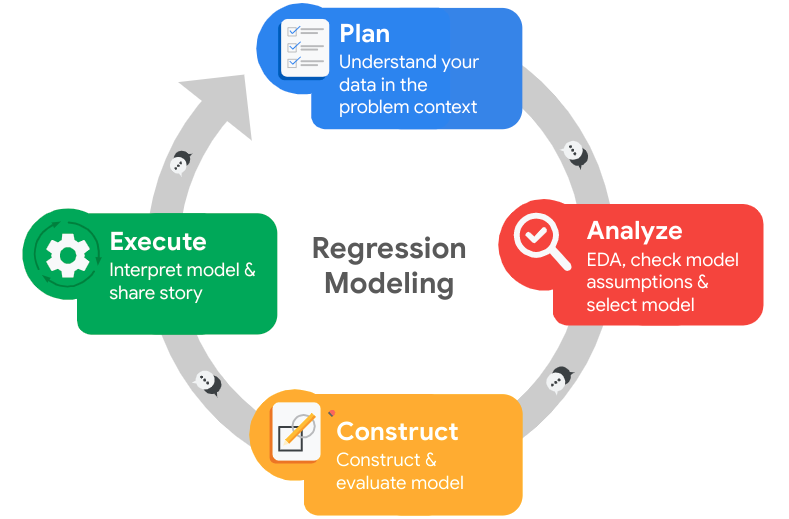



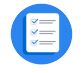  

# Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem

# To-Do
1- Do Exploratory Data analysis to figure out which variables have a direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2- Plot bar charts showing the impact of employee salaries on retention
3- Plot bar charts showing a correlation between department and employee retention
4- Now build a logistic regression model using variables that were narrowed down in step 1
5- Measure the accuracy of the model

🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it may be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭 
### Reflect on these questions as you complete the plan stage.

* <b>Who are your stakeholders for this project?</b> <br>
The stakeholders of the project are the key people in the consulting firm. The main stakeholders are the HR department and the Finance team<br>
since hiring and rehiring touches on these areas and hence identifying the probability of an employee leaving would concern them. <br>
The decision-making board are also stakeholders as they would like to know the information and work on retaining employees and hence gaining a
competitive advantage from the competitors<br>
* <b>What are you trying to solve or accomplish?</b>
<br> The aim is to create an accurate model that predicts whether an employee will leave the job based on the information we have about them<br>

* <b> What are your initial observations when you explore the data?</b>
<br> My initial observation is :
1. The largest department is <b>Sales</b> (4140) and the smallest is Management(630)
2. Most people earn a 'Low' salary while a few earn a 'High' salary
3. The average satisfaction level is 0.62 which is above the mid 0.5 threshhold
4. Most employees have spent an average of 3.5 years in the comapany, hence it may be relatively new
5. The average performance score is 0.72, meaning most of the employees are meeting expectations
6. Out of 11
* <b>Do you have any ethical considerations in this stage? </b>
The salaries have not been disclosed. This would have been an ethical consideration as it is guarded under employee-employer confidentiality




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

### Load dataset

In [2]:
# Load dataset into a dataframe
### YOUR CODE HERE ### 
hr_data = pd.read_csv("HR_Dataset.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
hr_data.head(n=5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 



In [3]:
list(hr_data.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [4]:
#Most people earn 'low' salary(7316) and only 1237 earn high salary
hr_data["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ### 
hr_data.info()
# The shape of the dataframe
hr_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(14999, 10)

### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
# include='all' including object type statistics
# top: most common value //unique: the number of unique choices //freq: frequency of the top
### YOUR CODE HERE ### 
hr_data.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ### 
list(hr_data.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [8]:
# Rename columns as needed
### YOUR CODE HERE ### 
hr_data.rename(columns={'Work_accident' : 'work_accident',
                        'Department':'department',
                        'time_spend_company':'years_spent_company',
                        'average_montly_hours':'average_monthly_hours',
                        'number_project' : 'number_of_projects'},inplace=True)

# Display all column names after the update
### YOUR CODE HERE ### 
hr_data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
hr_data.isna().head()
hr_data.isna().sum()


satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_spent_company      0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
hr_data.duplicated


<bound method DataFrame.duplicated of        satisfaction_level  last_evaluation  number_of_projects  \
0                    0.38             0.53                   2   
1                    0.80             0.86                   5   
2                    0.11             0.88                   7   
3                    0.72             0.87                   5   
4                    0.37             0.52                   2   
...                   ...              ...                 ...   
14994                0.40             0.57                   2   
14995                0.37             0.48                   2   
14996                0.37             0.53                   2   
14997                0.11             0.96                   6   
14998                0.37             0.52                   2   

       average_monthly_hours  years_spent_company  work_accident  left  \
0                        157                    3              0     1   
1                    

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
hr_duplicates = hr_data[hr_data.duplicated()]
hr_duplicates

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
hr_dataset = hr_data.drop_duplicates(keep='first').reset_index(drop = True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
hr_dataset.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='years_spent_company'>

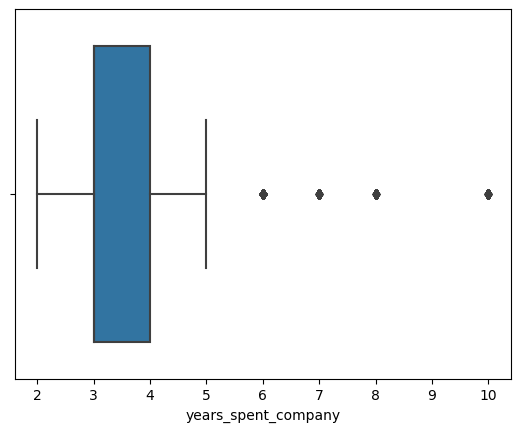

In [13]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###
# sns.boxplot(hr_dataset['satisfaction_level'])
# sns.boxplot(hr_dataset['last_evaluation'])
# sns.boxplot(hr_dataset['number_of_projects'])
# sns.boxplot(hr_dataset['avg_monthly_hrs'])
# sns.boxplot(hr_dataset['promotion_last_5years'])
# sns.boxplot(x='department', y='satisfaction_level', data=hr_dataset)
sns.boxplot(hr_dataset['years_spent_company'])



In [14]:
# Determine the number of rows containing outliers 
# 1886 rows contain outliers
# 15% of the dataset
### YOUR CODE HERE ###
hr_dataset.sort_values('years_spent_company')
years_morethan_4 = hr_dataset['years_spent_company']>4
no_of_outliers = hr_dataset.where(years_morethan_4).count()
outlier_percentage = no_of_outliers/hr_dataset.shape[0]*100
no_of_outliers


satisfaction_level       1886
last_evaluation          1886
number_of_projects       1886
average_monthly_hours    1886
years_spent_company      1886
work_accident            1886
left                     1886
promotion_last_5years    1886
department               1886
salary                   1886
dtype: int64

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

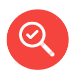
# Analyze Stage
- Perform EDA (analyze relationships between variables) 



💭 
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data? 
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

In [15]:
#Sales is the largest department - 4140 Management - 630
hr_data["department"].value_counts()   

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [16]:
#1991 left 10000 stayed
hr_dataset['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [17]:
#people in the sales department left the most
# The number of people who left per department
department_left = hr_dataset.groupby('department')['left'].sum().sort_values(ascending=False)
department_left

department
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: left, dtype: int64

In [18]:
#The number of people who left compared to their salary
#people in the sales department left the most
salary_left = hr_dataset.groupby('salary')['left'].sum().sort_values(ascending=False)

In [19]:
# hr_dataset.groupby('years_spent_')['left'].wher

In [32]:
# # hr_dataset.dtypes
# values = hr_dataset[['salary']].values
# hr_dataset['salary'] = OneHotEncoder().fit_transform(values).toarray()
salary_encoded = OneHotEncoder(drop='first').fit_transform(hr_dataset[['salary']]).toarray()
salary_encoded.type


AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [27]:
department_encoded = OneHotEncoder(drop='first').fit_transform(hr_dataset[['department']]).toarray()
department_encoded
hr_dataset['department'] = department_encoded
hr_dataset.head()
OneHotEncoder().categories_


AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

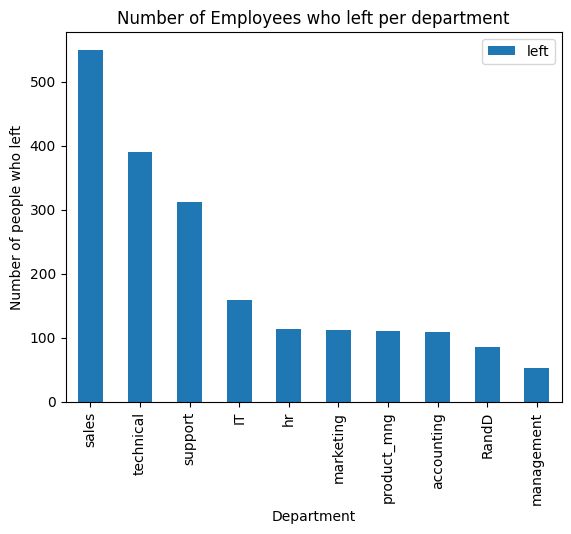

In [29]:
# bar chart: employee and retention
# salary, department

department_left.plot(kind='bar',title='Number of Employees who left per department')
plt.xlabel('Department')
plt.ylabel('Number of people who left')
plt.legend()

plt.show()


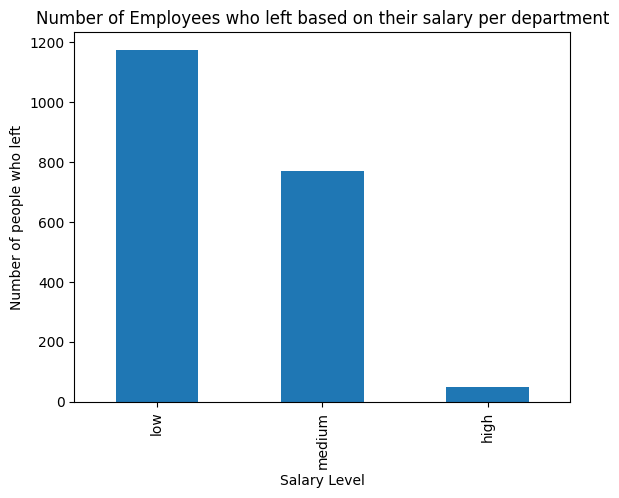

In [ ]:

salary_left.plot(kind='bar',title='Number of Employees who left based on their salary per department')
plt.xlabel('Salary Level')
plt.ylabel('Number of people who left')
plt.show()

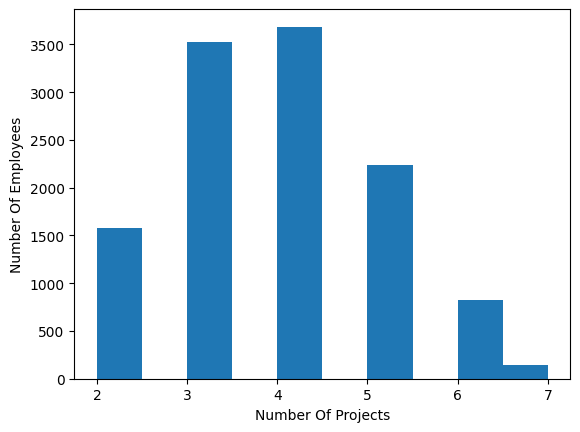

In [ ]:
plt.hist(data=hr_dataset,x="number_of_projects")
plt.ylabel("Number Of Employees")
plt.xlabel("Number Of Projects")
plt.show()

<AxesSubplot: xlabel='satisfaction_level', ylabel='left'>

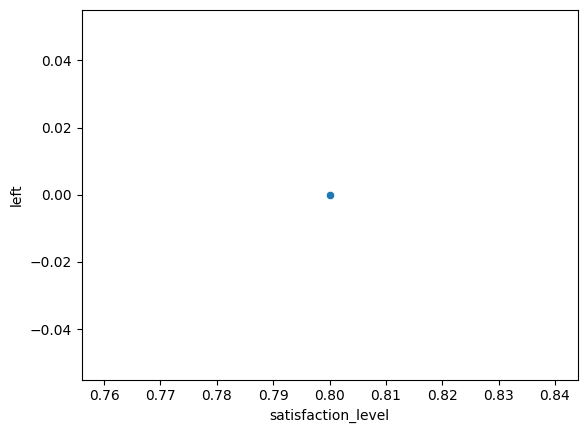

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
#Satisfaction and left
satisfaction_left = hr_dataset.groupby('satisfaction_level')['left'].sum().sort_values(ascending=False)
satisfaction_left
sns.scatterplot(y= satisfaction_left,x=hr_dataset['satisfaction_level'])

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='left', ylabel='years_spent_company'>

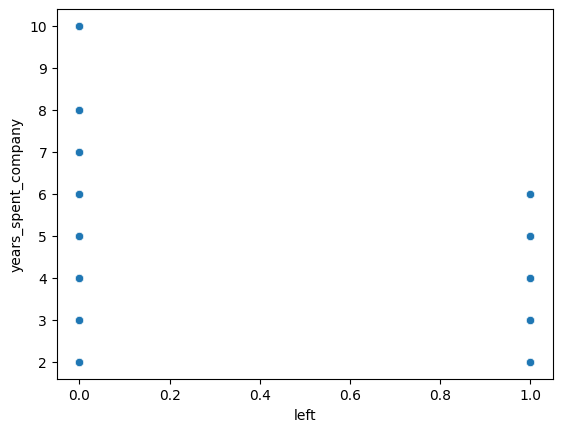

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
#last evaluation and left
#satisfaction and salary and left
# sns.scatterplot(hr_dataset['satisfaction_level'],hr_dataset['salary'],hr_dataset['left'])
# satisfaction, years, left

sns.scatterplot(hr_dataset['left'],hr_dataset['years_spent_company'])
# satisfaction, number_of projects
# department, satisfaction, left

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
X = hr_dataset.drop('left', axis=1)
y = hr_dataset['left']

# Create a heatmap using the seaborn heatmap function
hr_dataset.corr()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_company,work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.005382,-0.002552
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.002885,-0.005448
number_of_projects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.001464,0.010077
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.001007,0.004159
years_spent_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.003233,-0.008380
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.009777,0.011793
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.003324,-0.029016
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.034334,0.025610
department,0.005382,-0.002885,-0.001464,0.001007,-0.003233,-0.009777,-0.003324,-0.034334,1.000000,-0.073779
salary,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,-0.073779,1.000000


<AxesSubplot: >

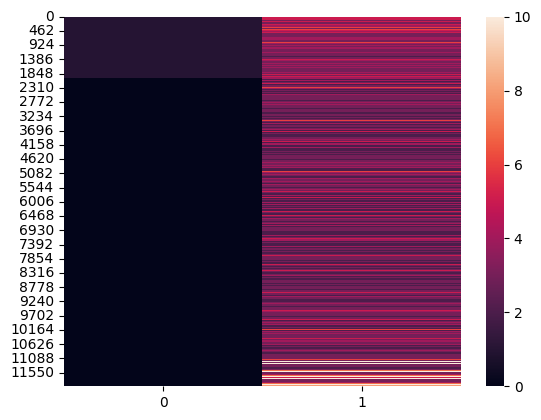

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
# Make sure the data has the correct shape
left = hr_dataset['left'].values.reshape(-1, 1)
years_spent_company = hr_dataset['years_spent_company'].values.reshape(-1, 1)

# # Create a NumPy array with the reshaped data
data = np.concatenate((left, years_spent_company), axis=1)

# Pass the NumPy array to the heatmap function
sns.heatmap(data)

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
hr_dataset.columns


Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_spent_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

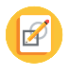
#Construct Stage
- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
##Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables 
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size 





💭 
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model, and why?
Satisfaction Level as it is highly negatively correlated with the left column. Hence many employees
leave due to not being satisfied with their roles.
- Are each of the assumptions met?
The dependent variable is binary (i.e., it has only two possible values).

The independent variables are related to the dependent variable in a linear fashion.
There is no multicollinearity among the independent variables (i.e., the independent variables are not highly correlated with each other).
The observations are independent of each other.
There is little or no error in the measurement of the independent variables.
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

<b>Binary Classification Task</b>:This is a Supervised Prediction Task since we have a label "Left". <br>
Since we are predicting whether the employee will Leave or Not. This is a Binary Classification Task

### Identify the types of models most appropriate for this task.

Logistic Regression Models are appropriate since they are linear models mainly used for binary classification

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
### YOUR CODE HERE ###
hr_dataset.columns
X = hr_dataset[['satisfaction_level','years_spent_company']]
y = hr_dataset["left"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8393, 2), (3598, 2), (8393,), (3598,))

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)
clf

LogisticRegression()

In [ ]:
clf.coef_

array([[-3.516142  ,  0.22662608]])

In [ ]:
clf.intercept_

array([-0.45276443])

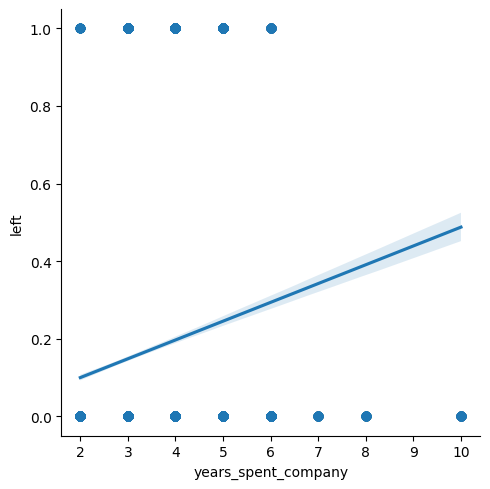

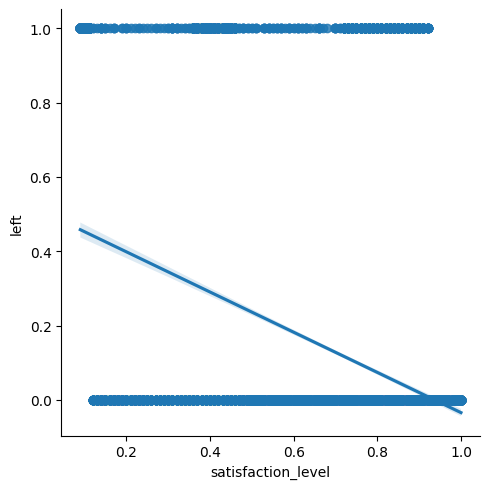

In [ ]:

# Select the columns to use as the independent and dependent variables
X = hr_dataset[['years_spent_company', 'satisfaction_level']]
y = hr_dataset['left']

# Create a regression plot using the seaborn lmplot function
sns.lmplot(x='years_spent_company', y='left', data=hr_dataset)
sns.lmplot(x='satisfaction_level', y='left', data=hr_dataset)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
clf.predict_proba(X_test)


array([[0.41001263, 0.58998737],
       [0.89550094, 0.10449906],
       [0.94519383, 0.05480617],
       ...,
       [0.8887348 , 0.1112652 ],
       [0.44441384, 0.55558616],
       [0.94872473, 0.05127527]])

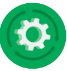
#Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [33]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

NameError: name 'y_test' is not defined

✏
##Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. 
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭 
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?<br>
The satisfaction level and the years of working within the company are the biggest tell-tale signs of whether an employee will leave or not.

- What potential recommendations would you make to your manager/company?<br>
Enhancing activities to boost the satisfaction levels of the employees to improve the retention level of the employees within the company
- Do you think your model could be improved? Why or why not? How? 
Yes, if I added more significant independent variables, the model would produce better results.
Also, working with a larger dataset would be helpful
- What business recommendations do you propose based on the models built?
<br> - Promoting activities among employees that increase satisfaction levels
<br> - Creating a conducive work environment for employees to flourish
- <b>Given what you know about the data and the models you were using, what other questions could you address for the team?</b>
<br>-How can the company improve employee satisfaction and retention?
<br>-How does the relationship between employee satisfaction and turnover vary across different departments or job roles?
-<br><b> Do you have any ethical considerations in this stage?</b><br>
        -Ensuring that the model is not biased against any particular group of employees<br>
        -Ensuring that the model is not used to discriminate against employees<br>
        -Ensuring that the model is transparent and that employees are aware of how it is being used to make decisions about their careers







Double-click to enter your responses here.

##Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]